## Example: Iris Dataset

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.describe(include='all')
im

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [3]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

## Visualize the Iris data

In [ ]:
%matplotlib inline
import seaborn as sns
sns.set()
sns.pairplot(iris, hue='species', height=100) # size parameter has been renamed to height
iris.split

AttributeError: 'DataFrame' object has no attribute 'split'

## Extracting features matrix and target array

- Using Iris dataset by applying Pandas dataframe

In [6]:
X_iris = iris.drop('species', axis=1)
print(X_iris.shape)
type(X_iris)

(150, 4)


pandas.core.frame.DataFrame

In [8]:
y_iris = iris['species']
print(y_iris.shape)
type(y_iris)

(150,)


pandas.core.series.Series

## Supervised learning example: Simple linear regression

- Consider a simple linear regression by fitting a line to (x,y) data
- We will use Iris sample data for our regression example

(50,)
1
(50,)
1


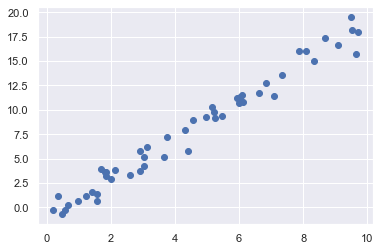

In [9]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 *rng.rand(50)
y = 2 * x - 1 + rng.randn(50) # 2 is slop and -1 is intercept

plt.scatter(x,y)
print(x.shape)
print(x.ndim)
print(y.shape)
print(y.ndim)

In [10]:
X = x[:, np.newaxis]
print(X.shape)
print(X.ndim)

(50, 1)
2


- Choose a class model
    - we can import a linear regression class

In [11]:
from sklearn.linear_model import LinearRegression

- Instantiation of Linear Regression class and specifying the hyperparameter

In [12]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

- Fit the model to our data
    - applying our model to data using fit() method of the model

In [13]:
model.fit(X,y)

LinearRegression()

- The results are stored in model -specific attributes
- All model parameters that were learned during fit() process have trailing
underscore

In [15]:
model.coef_

array([1.9776566])

In [16]:
model.intercept_

-0.9033107255311164

## Predict labels for unknow data

- Here new data will be a grid of x values
- We will ask what y values the model predicts

In [17]:
xfit = np.linspace(-1, 11)

In [18]:
# Transforming x values into [n_samples, n_features]
Xfit = xfit[:, np.newaxis]

In [19]:
yfit = model.predict(Xfit)

## Visualize the raw data and this model fit

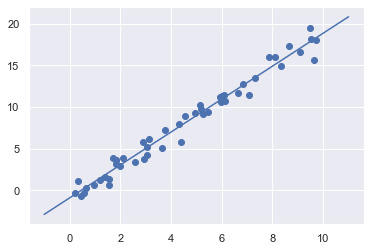

In [20]:
plt.scatter(X,y) # raw data
plt.plot(xfit, yfit) # model fit

## Supervised Learning Example: Iris Classification

- In this example of Iris classification we will be using Gaussian Naive Bayes
- It is fast and no hyperparameter to choose
- Bayes is often a good model to use as a baseline classification for 
further improvements

**Evaluate the model on data it has not seen before**

- Split the data into training set and testing set
- Using train_test_split function

In [1]:
from sklearn.model_selection import train_test_split

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# extracting features matrix
X_iris = iris.drop('species', axis=1)
print(X_iris.shape)
type(X_iris)

(150, 4)


pandas.core.frame.DataFrame

In [4]:
# extracting target array
y_iris = iris['species']
print(y_iris.shape)
type(y_iris)

(150,)


pandas.core.series.Series

In [5]:
# splitting the data into training and test dataset

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [6]:
# Choose the model
from sklearn.naive_bayes import GaussianNB

In [7]:
# Instantiate the model
model = GaussianNB()

In [8]:
# fit the model
model.fit(Xtrain, ytrain)

GaussianNB()

In [9]:
# predict on new data
y_model = model.predict(Xtest)

**Use accuracy score to match the predicted labels with their true value**

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

In [13]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [16]:
print(len(ytest))
print(len(y_model))

38
38


## Unsupervised Learning Example: Iris dimensionality reduction

- Iris data is having four features means four dimensional data
- The purpose is to visualize the data by retaining the essential features of the data
- It is hard to visualize four-dimensional data compare to two-dimensional data

**Using Principal Component Analysis (PCA)**

- A fast linear dimensionality reduction technique
- Asking the model to return two-dimensional data

**Let's follow our sequence of steps**

In [17]:
# Choose the model class
from sklearn.decomposition import PCA

In [18]:
# Instantiate the model with hyperparameters
model = PCA(n_components=2)

In [19]:
# fit the data, notice y is not specified
model.fit(X_iris)

PCA(n_components=2)

In [20]:
# transform the data to two dimension
X_2d = model.transform(X_iris)

In [23]:
X_2d

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [21]:
iris['PCA1'] = X_2d[:,0]
iris['PCA2'] = X_2d[:,1]

In [22]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.944110,0.187532
146,6.3,2.5,5.0,1.9,virginica,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,virginica,1.764346,0.078859
148,6.2,3.4,5.4,2.3,virginica,1.900942,0.116628


- Visualizing the two-dimensional data after applying PCA

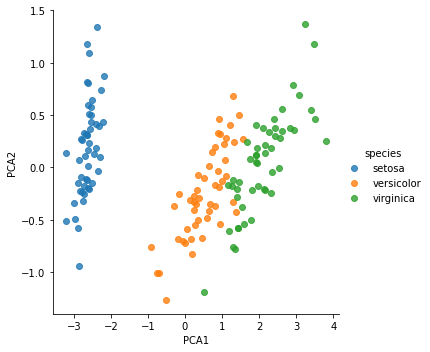

In [25]:
sns.lmplot(data= iris, x = 'PCA1', y='PCA2', hue='species', fit_reg=False)

# Unsupervised Learning: Iris clustering

- We will apply clustering to the Iris data
- Without any reference to any label, clustering trues to find the groups in data
- Gaussian mixture model is a powerful clustering method

In [26]:
# Choose the model
from sklearn.mixture import GaussianMixture as GMM

In [27]:
# Instantiate the model with hyperparameter
model = GMM(n_components=3, covariance_type='full')
# covariance type controls the degree of freedom in the shape of each cluster
# covariance type = 'full' allows each cluster to be modeled as an ellipse

In [28]:
# fit the data
model.fit(X_iris)

# notice we have not specified y

GaussianMixture(n_components=3)

In [29]:
# Determine the cluster
y_gmm = model.predict(X_iris)

- We add cluster label to iris Dataframe and use seaborn to plot results

In [30]:
iris['cluster'] = y_gmm

In [31]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,cluster
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,1
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,1
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,1
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,1
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,1
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.944110,0.187532,0
146,6.3,2.5,5.0,1.9,virginica,1.527167,-0.375317,0
147,6.5,3.0,5.2,2.0,virginica,1.764346,0.078859,0
148,6.2,3.4,5.4,2.3,virginica,1.900942,0.116628,0


In [32]:
iris['cluster'].value_counts()

0    55
1    50
2    45
Name: cluster, dtype: int64

## Visualizing the clusters

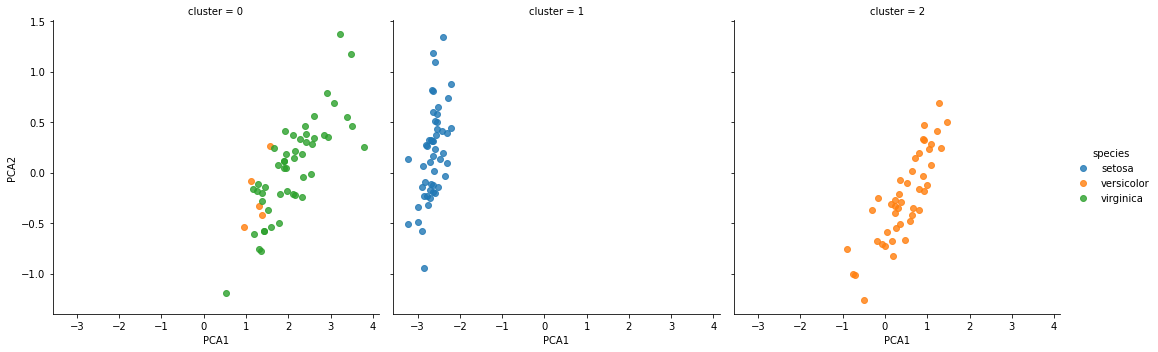

In [33]:
sns.lmplot(data=iris, x='PCA1', y='PCA2', hue='species', 
           col='cluster', fit_reg=False)

# Hyperparameters and Model Validation

**The most important question in machine learning is how to select 
and validate your model**

1. Choose the model
2. Choose a model hyperparameter
3. Fit the model to the training data
4. Use the model to predict the labels for new data

## Thinking about Model Validation

- One way to check the effectiveness of our model is to apply training data
and compare the prediction to the known value

### Model validation the wrong way

- Let's import the data

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
# extracting features and target values from iris data
X = iris.data
y = iris.target

- Here we will use k-neighbors classifier with n_neighbors=1
- It says the label of an unknow point is the same as the label of its 
closest training point

In [3]:
# Choose the model
from sklearn.neighbors import KNeighborsClassifier

In [4]:
# Instantiate the model with hyperparameter
model = KNeighborsClassifier(n_neighbors=1)

In [5]:
# We train the model means fit the model
model.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

In [6]:
# Use the trained model to predict labels for data we already know
y_model = model.predict(X)

In [41]:
# Calculate the accuracy score

accuracy_score(y, y_model)

1.0

## Model Validation the right way: Holdout sets

- We can have a better sense of a model's performance by using holdout set
and then use this holdout set to check the model performance
- We can do this splitting the data by using train_test_split utility

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# Split the data with 50% in each set
# using X-data, y-target of the iris dataset

X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5)

In [9]:
# fit the model on one set of the data
model.fit(X1, y1)

KNeighborsClassifier(n_neighbors=1)

In [10]:
# Predict the model on the second set of data
y2_model = model.predict(X2)

In [46]:
# Evaluate the accuracy score
accuracy_score(y2, y2_model)

0.9066666666666666

## Model validation via cross-validation

- Two fold cross-validation

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
# fitting the model and predicting on new data
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

- Five fold cross-validation

In [13]:
from sklearn.model_selection import cross_val_score


In [14]:
# calculating the score using five fold cross validation
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [51]:
score = cross_val_score(model, X, y, cv=5)
score.mean()

0.96

# Leave One-Out Cross-Validation

In [15]:
from sklearn.datasets import load_iris
iris = load_iris()

In [16]:
X = iris.data
y = iris.target

In [17]:
# Choose the model 
# Instantiate the model with hyperparameter
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [19]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

In [21]:
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
print(scores)
len(scores)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


150

In [22]:
scores.mean()

0.96

# Selecting the Best Model

- How to select the Best Model using model selection 
and selection of hyperparameters?

- What to do when our estimator is underperforming?

- Use a more complicated/more flexible model
- Use a less complicated/less flexible model
- Gather more training samples
- Gather more data to add features to each sample

- Determine what steps will improve your model is what separate the successful
machine learning practitioners from the unsuccessful

## The Bias-Variance Trade-Off

- Best is the trade-off between bias and variance
- Below figure represents two regression fits to the same dataset
- Both the models fails in different as none of the model is a good fir to
the data

<img src='figure_bias_variance.png' align ='left'>

**The Purpose of the best model is to have high accuracy for the test data
as well as for training data**

<img src='figure_validation_curve.png' width = 600, height = 400, align='left'>

## Validation curves in Scikit-Learn

- Calculating validation curve using cross-validation
- We will be using polynomial regression which is a generalized model in which degree of polynomial is a tunable parameter
- For example: one degree of polynomial fits the straight line to the data
- Three -degree polynomial model parameter

- To generalize the model we will be using number of polynomial features
- We can combine simple linear regression with polynomial preprocessor
- We will use pipeline to string these operations together

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [26]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

- Creating the data to fit the model

In [27]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    #randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2 # random values in a given shape 
    # i.e. N values of 1-dimension
    y = 10 - 1 / (X.ravel() + 0.1) # X.ravel() returns a flattened array
    
    if err > 0:
        y+= err * rng.randn(N)
        return X, y
    
X, y = make_data(40)

## Visualize the data with polynomial fits of several degree

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # plot formatting

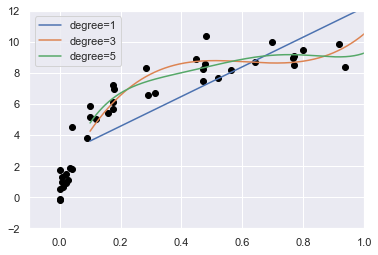

In [30]:
X_test = np.linspace(0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()

for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
    
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best')

<img src='figure_validation_score.png' width = '400' height = '350' align = 'left'> 

## Learning Curve

- Optimal model depends upon the size of the training data
- Generating the new dataset with a factor of five more points

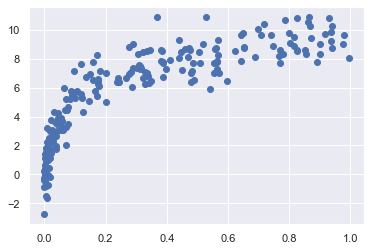

In [32]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2)

<img src='figure_validation_score_Lsample.png' width = '400' height = '400'
align = 'left'>

## Learning Curves in Scikit-Learn

- Let's compute learning curve using scikit-learn library
- Where in we will be using second order and ninth-order polynomial model
- We will be using original dataset of 40 data points

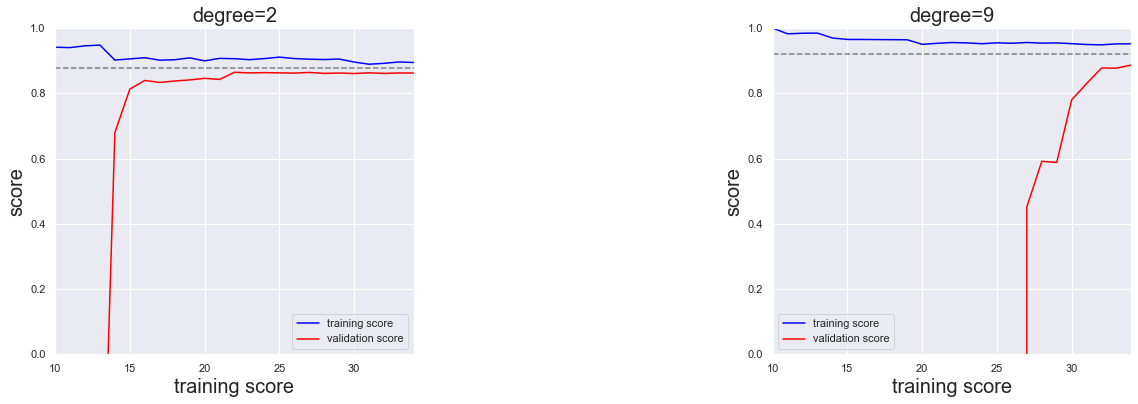

In [41]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize = (46, 6))
fig.subplots_adjust(left=0.625, right=0.95, wspace=1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                        X, y, cv=7,
                                        train_sizes=np.linspace(0.3, 1, 25))
    
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                color='grey', linestyle = 'dashed')
    
    ax[i].set_ylim(0,1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training score', size=20)
    ax[i].set_ylabel('score', size=20)
    ax[i].set_title('degree={0}'.format(degree), size=20)
    ax[i].legend(loc='best')

# Feature Engineering

- Feature engineering takes what ever information you have about your problem and turning it into
numbers that you can use to build your features matrix

**Ｗe will cover**
- Features for representing `categorical data`
- Features for representing `text`
- `Derived Features` for increasing model complexity
- Imputation of missing data

The above process is called **Vectorization** means converting arbitrary data into vectors

## Categorical Features

- Categorical data is non-numerical data
    - Example: having house information of price, room along with neighborhood

In [42]:
data = [
    {'price': 85000, 'room': 4, 'neighborhood': 'Queen Anne'},
    {'price': 70000, 'room': 3, 'neighborhood': 'Fremont'},
    {'price': 65000, 'room': 3, 'neighborhood': 'Wallingford'},
    {'price': 60000, 'room': 2, 'neighborhood': 'Fremont'},
    
]

In [43]:
data

[{'price': 85000, 'room': 4, 'neighborhood': 'Queen Anne'},
 {'price': 70000, 'room': 3, 'neighborhood': 'Fremont'},
 {'price': 65000, 'room': 3, 'neighborhood': 'Wallingford'},
 {'price': 60000, 'room': 2, 'neighborhood': 'Fremont'}]

- The possible solution is one-hot-coding which creates extra column indicating the presence or
absence of a cetagory with a value of 1 or 0
- Using DictVectorizer when our data is coming in the form of Dictionary

In [45]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[    0,     1,     0, 85000,     4],
       [    1,     0,     0, 70000,     3],
       [    0,     0,     1, 65000,     3],
       [    1,     0,     0, 60000,     2]])

In [47]:
vec.get_feature_names()

C:\Users\cccm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'room']

In [48]:
vec.get_feature_names_out()

array(['neighborhood=Fremont', 'neighborhood=Queen Anne',
       'neighborhood=Wallingford', 'price', 'room'], dtype=object)

In [49]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

## Text Features

- Converting text into numerical values
- One of the simplest method is by word_counts
- Means counting the occurance of each word and put them in a table
- Using CountVectorizer

In [50]:
sample = ['problem of evil',
         'evil queen',
         'horizon problem']

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

In [52]:
vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [53]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


## Derived Features

- Means the features that are mathematically derived from some input features
- Like converting a linear regression into polynomial regression from input data

In [54]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

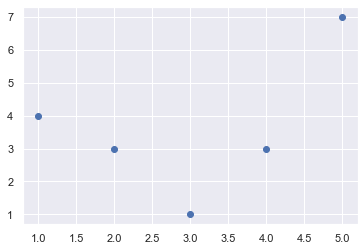

In [55]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 3, 1, 3, 7])
plt.scatter(x, y)

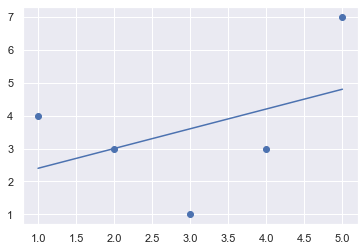

In [56]:
from sklearn.linear_model import LinearRegression

X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit)

- This is a poor fit of a straight line

- We need a more complex model to describe the relationship between x and y
- To drive a more flexibility in the model we can add extra polynomial features means 
adding extra features


In [58]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


- Now let's compute the linear regression on this data

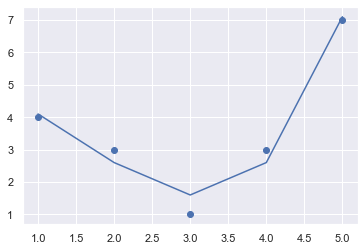

In [59]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit)

## Imputation of Missing Data

- How to handle missing data using machine learning approach
- Using imputation of missing values, range from mean, median or most frequent values

In [60]:
from numpy import nan

X = np.array([[nan, 0, 3],
            [3, 7, 9],
            [3, 5 ,2],
            [4, nan, 6],
            [8, 8, 1]]
            )

y = np.array([14, 16, -1, 8, -5 ])

In [61]:
from sklearn.impute import SimpleImputer

In [62]:
imp = SimpleImputer(missing_values=nan, strategy='mean')
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [63]:
imp = SimpleImputer(missing_values=nan, strategy='most_frequent')
X2 = imp.fit_transform(X)
X2

array([[3., 0., 3.],
       [3., 7., 9.],
       [3., 5., 2.],
       [4., 0., 6.],
       [8., 8., 1.]])

In [64]:
imp = SimpleImputer(missing_values=nan, strategy='constant', fill_value=6)
X2 = imp.fit_transform(X)
X2

array([[6., 0., 3.],
       [3., 7., 9.],
       [3., 5., 2.],
       [4., 6., 6.],
       [8., 8., 1.]])

In [65]:
imp = SimpleImputer(missing_values=nan, strategy='constant')
X2 = imp.fit_transform(X)
X2

array([[0., 0., 3.],
       [3., 7., 9.],
       [3., 5., 2.],
       [4., 0., 6.],
       [8., 8., 1.]])

- The imputed data can be fed into LinearRegression estimator

In [66]:
model = LinearRegression().fit(X2, y)
model.predict(X2)

array([10.94364937, 15.28085868,  3.41758242,  9.48964988, -7.13174035])